# Predict Credit Card Acceptance

In [2]:
# Importing Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Getting the Data

In [3]:
try:
    data=pd.read_csv("MSDos.csv")          # reading the file from Local Disk
    df = data.copy()                       # creating copy of the DataFrame
except:
    print("Please Define Correct Path, Correct Name & Correct Format of Dataset")

## 2. Data Checking Process

In [4]:
print("Input Data Contain :-")
print("---------------------")
print("rows: {}".format(df.shape[0]),end=" ")
print("\nNumber of observations: {}".format(df.shape[1]))
print("\nColumns are :-")
print("--------------")
# df.columns = [x.lower() for x in df.columns]
print(data.columns)

Input Data Contain :-
---------------------
rows: 1319 
Number of observations: 12

Columns are :-
--------------
Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')


In [5]:
data.describe(include="all")    # excludes missing values

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
count,1319,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319,1319,1319.000000,1319.000000,1319.000000,1319.000000
unique,2,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,yes,NaN,NaN,NaN,NaN,NaN,no,no,NaN,NaN,NaN,NaN
freq,1023,NaN,NaN,NaN,NaN,NaN,738,1228,NaN,NaN,NaN,NaN
mean,NaN,0.456406,33.213103,3.365376,0.068732,185.057071,NaN,NaN,0.993935,55.267627,0.817286,6.996967
std,NaN,1.345267,10.142783,1.693902,0.094656,272.218917,NaN,NaN,1.247745,66.271746,0.386579,6.305812
min,NaN,0.000000,0.166667,0.210000,0.000109,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,25.416670,2.243750,0.002316,4.583333,NaN,NaN,0.000000,12.000000,1.000000,2.000000
50%,NaN,0.000000,31.250000,2.900000,0.038827,101.298300,NaN,NaN,1.000000,30.000000,1.000000,6.000000
75%,NaN,0.000000,39.416670,4.000000,0.093617,249.035800,NaN,NaN,2.000000,72.000000,1.000000,11.000000


## 3. Data Cleaning Process

#### 3.1. Replacing all null values if any

In [6]:
if(df["card" and "reports" and "age" and "income" and "share" and "expenditure" and "owner" and 
      "selfemp" and "dependents" and "months" and "majorcards"].count()==data.shape[0]):
    print("There is no NuLL value in your Database")
else:         
    print("NuLL value present in your Database")
    df.loc[df.card.isnull(),"card"]               ="no"
    df.loc[df.owner.isnull(),"owner"]             ="no"
    df.loc[df.selfemp.isnull(),"selfemp"]         ="no"
    df.loc[df.reports.isnull(),"reports"]         =0
    df.loc[df.majorcards.isnull(),"majorcards"]   =0
    df.loc[df.age.isnull(),"age"]                 =df["age"].mean() or df["age"].median()
    df.loc[df.income.isnull(),"income"]           =df["income"].mean() or df["income"].median()
    df.loc[df.share.isnull(),"share"]             =df["share"].mean() or df["share"].median()
    df.loc[df.expenditure.isnull(),"expenditure"] =df["expenditure"].mean() or df["expenditure"].median()
    df.loc[df.dependents.isnull(),"dependents"]   =df["dependents"].mean() or df["dependents"].median()
    df.loc[df.months.isnull(),"months"]           =df["months"].mean() or df["months"].median()
    df.loc[df.active.isnull(),"active"]           =df["active"].mean() or df["active"].median()  

There is no NuLL value in your Database


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

#### 3.2. Checking the percentage of missing data

In [7]:
total = df.isnull().sum().sort_values(ascending = True)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = True)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

#### 3.3. Detecting copy of data

In [8]:
duplicateRows=df[df.duplicated()]
print("Printing Duplicate data accross whole Dataframe")
print(duplicateRows)

Printing Duplicate data accross whole Dataframe
Empty DataFrame
Columns: [card, reports, age, income, share, expenditure, owner, selfemp, dependents, months, majorcards, active]
Index: []


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

#### 3.4. Exploring data(Detecting outliers) & Removing outliers

Before removing outliers


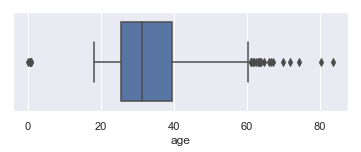

After removing outliers


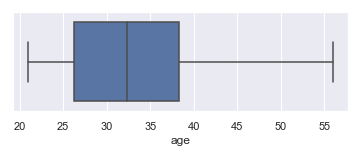

In [11]:
# boxplotting age value before removeing outliers
print("Before removing outliers")
fig1= plt.figure()
fig1.add_subplot(2,1,1)
sns.set(style="darkgrid")
sns.boxplot(x=df["age"])
plt.show()

# replacing spike factor with mean value of age
mean_age= df.loc[df["age"] < max(df["age"]), "age"].mean()
df["age"] = np.where(df["age"] < 21, mean_age ,df["age"])
df["age"] = np.where(df["age"] > 56, mean_age ,df["age"])


# boxplotting age value after removeing outliers
print("After removing outliers")
fig2= plt.figure()
fig2.add_subplot(2,1,2)
sns.set(style="darkgrid")
sns.boxplot(x=df["age"])
plt.show()

In [12]:
# Rounding off age column
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [13]:
# Rounding off the value of age into nearest value
df["age"] = df["age"].apply(np.round)

In [14]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,38.0,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.0,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,34.0,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.0,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.0,9.7867,0.067051,546.503300,yes,no,2,64,1,5


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

Before removing outliers


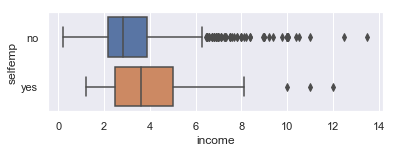

After removing outliers


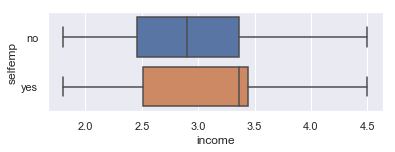

In [94]:
# boxplotting income & employment before removeing outliers
print("Before removing outliers")
fig3= plt.figure()
fig3.add_subplot(2,1,1)
sns.set(style="darkgrid")
sns.boxplot(x="income",y="selfemp",data=df)
plt.show()

# replacing spike factor with mean value of income
#df["selfemp"][df.index]=="no"
#if(df.index[7]==0):
for x in range (df.shape[0]):
    if(df.selfemp[x]=='no'):
        mean_age= df.loc[df["income"] < max(df["income"]), "income"].mean()
        df["income"] = np.where(df["income"]<1.5, mean_age,df["income"])
        df["income"] = np.where(df["income"]>4.5, mean_age,df["income"])
    else:
        mean_age= df.loc[df["income"] < max(df["income"]), "income"].mean()
        df["income"] = np.where(df["income"]<1.8, mean_age,df["income"])
        df["income"] = np.where(df["income"]>7.5, mean_age,df["income"])

# boxplotting income & employment after removeing outliers
print("After removing outliers")
fig4= plt.figure()
fig4.add_subplot(2,1,2)
sns.set(style="darkgrid")
sns.boxplot(x="income",y="selfemp",data=df)
plt.show()

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

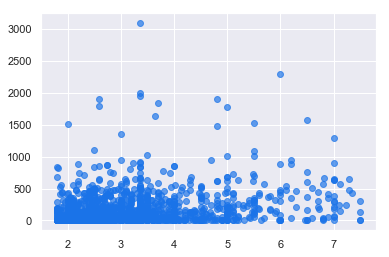

In [15]:
sns.set(style="darkgrid")
plt.scatter(x="income",y="expenditure",color="#1a73e8ad",data=df)
plt.show()

Before removing outliers


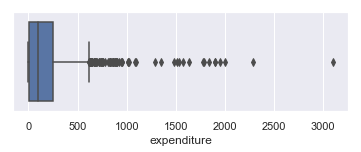

After removing outliers


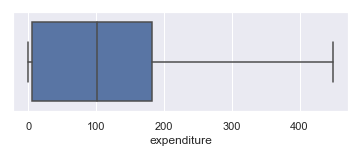

In [16]:
# boxplotting monthly expenses before removeing outliers
print("Before removing outliers")
fig5= plt.figure()
fig5.add_subplot(2,1,1)
sns.set(style="darkgrid")
sns.boxplot(x="expenditure",data=df)
plt.show()

# replacing spike factor with mean value of expenditure
mean_age= df.loc[df["expenditure"] < max(df["expenditure"]), "expenditure"].mean()
df["expenditure"] = np.where(df["expenditure"] < 0, mean_age ,df["expenditure"])
df["expenditure"] = np.where(df["expenditure"] > 450, mean_age ,df["expenditure"])

# boxplotting monthly expenses after removeing outliers
print("After removing outliers")
fig6= plt.figure()
fig6.add_subplot(2,1,2)
sns.set(style="darkgrid")
sns.boxplot(x="expenditure",data=df)
plt.show()

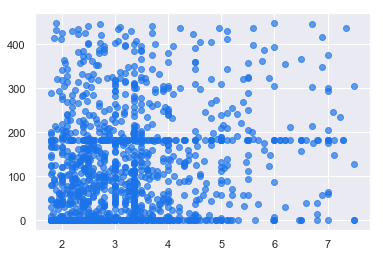

In [17]:
sns.set(style="darkgrid")
plt.scatter(x="income",y="expenditure",color="#1a73e8ad",data=df)
plt.show()

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

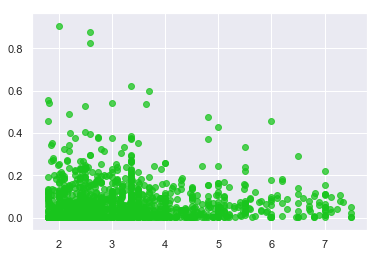

In [18]:
sns.set(style="darkgrid")
plt.scatter(x="income",y="share",color="#19c51dbf",data=df)
plt.show()

Before removing outliers


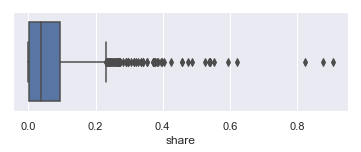

After removing outliers


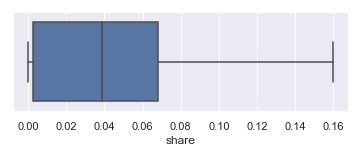

In [19]:
# boxplotting share before removeing outliers
print("Before removing outliers")
fig7= plt.figure()
fig7.add_subplot(2,1,1)
sns.set(style="darkgrid")
sns.boxplot(x="share",data=df)
plt.show()

# replacing spike factor with mean value of share
mean_age= df.loc[df["share"] < max(df["share"]), "share"].mean()
df["share"] = np.where(df["share"] < 0, mean_age ,df["share"])
df["share"] = np.where(df["share"] > 0.160, mean_age ,df["share"])

# boxplotting share after removeing outliers
print("After removing outliers")
fig8= plt.figure()
fig8.add_subplot(2,1,2)
sns.set(style="darkgrid")
sns.boxplot(x="share",data=df)
plt.show()

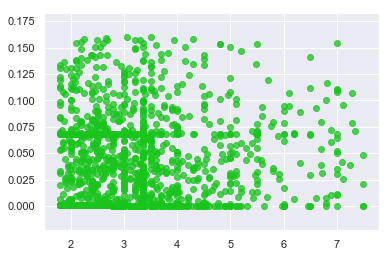

In [20]:
sns.set(style="darkgrid")
plt.scatter(x="income",y="share",color="#19c51dbf",data=df)
plt.show()

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

#### 3.5. Share value how much dependent upon income and expenditure

Text(0.5, 0, 'share')

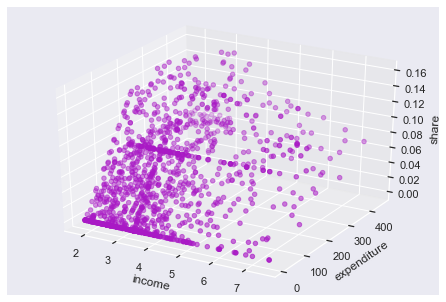

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
fig=plt.figure()
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (8,6) 
X,y = make_blobs(n_samples=800,n_features=3,centers=4)
ax = Axes3D(fig)
ax.scatter(xs=df["income"],ys=df["expenditure"],zs=df["share"],color="#a919c5bf")
ax.set_xlabel('income')
ax.set_ylabel('expenditure')
ax.set_zlabel('share')

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

### Rechecking the data

In [22]:
df.describe(include="all")

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
count,1319,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319,1319,1319.000000,1319.000000,1319.000000,1319.000000
unique,2,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,yes,NaN,NaN,NaN,NaN,NaN,no,no,NaN,NaN,NaN,NaN
freq,1023,NaN,NaN,NaN,NaN,NaN,738,1228,NaN,NaN,NaN,NaN
mean,NaN,0.456406,33.013647,3.326168,0.045196,121.538634,NaN,NaN,0.993935,55.267627,0.817286,6.996967
std,NaN,1.345267,8.110661,1.187815,0.041644,116.915316,NaN,NaN,1.247745,66.271746,0.386579,6.305812
min,NaN,0.000000,21.000000,1.800000,0.000109,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,26.000000,2.468150,0.002316,4.583333,NaN,NaN,0.000000,12.000000,1.000000,2.000000
50%,NaN,0.000000,32.000000,3.180000,0.038827,101.298300,NaN,NaN,1.000000,30.000000,1.000000,6.000000
75%,NaN,0.000000,38.000000,3.750000,0.068097,182.845805,NaN,NaN,2.000000,72.000000,1.000000,11.000000


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

## 4. Training & Testing datasets

### K-nearest neighbors calssification (KNN)

In [5]:
import seaborn
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

# creating the data set for KNN
training_data_knn = pd.DataFrame()
training_data_knn["income"]      = df["income"]
training_data_knn["expenditure"] = df["expenditure"]
training_data_knn["share"]       = df["share"]
training_data_knn["outcome"]     = df["card"]
training_data_knn.head()

,income,expenditure,share,outcome
0,4.5200,124.983300,0.033270,yes
1,2.4200,9.854167,0.005217,yes
2,4.5000,15.000000,0.004156,yes
3,2.5400,137.869200,0.065214,yes
4,9.7867,546.503300,0.067051,yes


In [6]:
X = training_data_knn.as_matrix(columns=["income","share","expenditure"])
y = np.array(training_data_knn["outcome"])

# train the learner
classifier_knn = neighbors.KNeighborsClassifier(3,weights="uniform")
trained_model_knn  = classifier_knn.fit(X,y)
# model has been trained

accuracy_knn=trained_model_knn.score(X,y)    # view the model's score
print("Score:",accuracy_knn)

Score: 0.9810462471569371


C:\Users\suman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [26]:
input_income=float(input("Income:"))
input_expand=float(input("Expenditure:"))
input_share=input_income/input_expand
X_test = np.array([[input_income,input_share,input_expand]])    # create a test row
print(trained_model_knn.predict(X_test))   

Income: 2.0
Expenditure: 200


['yes']


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

### Naive Bayes 

In [7]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 

# creating the data set for Naive Bayes
training_data_nb = pd.DataFrame()
training_data_nb["income"]      = df["income"]
training_data_nb["expenditure"] = df["expenditure"]
training_data_nb["share"]       = df["share"]
training_data_nb["outcome"]     = df["card"]
training_data_nb.head()

,income,expenditure,share,outcome
0,4.5200,124.983300,0.033270,yes
1,2.4200,9.854167,0.005217,yes
2,4.5000,15.000000,0.004156,yes
3,2.5400,137.869200,0.065214,yes
4,9.7867,546.503300,0.067051,yes


In [8]:
X = training_data_nb.as_matrix(columns=["income","share","expenditure"])
y = np.array(training_data_nb["outcome"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
gnb = GaussianNB() 
trained_model_nb=gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy_nb=metrics.accuracy_score(y_test, y_pred)
print("Score:",accuracy_nb)

Score: 0.9829545454545454


C:\Users\suman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [31]:
input_income=float(input("Income:"))
input_expand=float(input("Expenditure:"))
input_share=input_income/input_expand
X_test = np.array([[input_income,input_share,input_expand]])    # create a test row
print(trained_model_nb.predict(X_test))  

Income: 4.2
Expenditure: 1000


['yes']


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

### Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# creating the data set for Linear Regressign
training_data_lr = pd.DataFrame()
training_data_lr["income"]      = df["income"]
training_data_lr["expenditure"] = df["expenditure"]
training_data_lr["share"]       = df["share"]
training_data_lr["outcome"]     = df["card"]
training_data_lr.outcome.replace(("yes", "no"), (1,0), inplace=True)
training_data_lr.head()

,income,expenditure,share,outcome
0,4.5200,124.983300,0.033270,1
1,2.4200,9.854167,0.005217,1
2,4.5000,15.000000,0.004156,1
3,2.5400,137.869200,0.065214,1
4,9.7867,546.503300,0.067051,1


In [11]:
X = training_data_lr.drop("outcome",axis = 1)
scaler=StandardScaler()
X_std = scaler.fit_transform(X) 
trained_model_lr= LinearRegression().fit(X_std,training_data_lr.outcome)

accuracy_lr=trained_model_lr.score(X_std,training_data_lr.outcome)
print ("Score:",accuracy_lr)

Score: 0.16396251444287557


In [12]:
input_income=float(input("Income:"))
input_expand=float(input("Expenditure:"))
input_share=input_income/input_expand
X_test = np.array([[input_income,input_share,input_expand]]) 
X_test_std = scaler.fit_transform(X_test)
print(trained_model_lr.predict(X_test))

Income: 52
Expenditure: 300


[51.12358504]


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

### Decision Tree

In [13]:
from sklearn import tree

# creating the data set for Decision Tree
training_data_dt= pd.DataFrame()
training_data_dt["income"]      = df["income"]
training_data_dt["expenditure"] = df["expenditure"]
training_data_dt["share"]       = df["share"]
training_data_dt["outcome"]     = df["card"]
training_data_dt.head()

,income,expenditure,share,outcome
0,4.5200,124.983300,0.033270,yes
1,2.4200,9.854167,0.005217,yes
2,4.5000,15.000000,0.004156,yes
3,2.5400,137.869200,0.065214,yes
4,9.7867,546.503300,0.067051,yes


In [15]:
X = training_data_dt.as_matrix(columns=["income","share","expenditure"])
y = np.array(training_data_dt["outcome"])

clf = tree.DecisionTreeClassifier()
trained_model_dt = clf.fit(X, y)

accuracy_dt=trained_model_dt.score(X,y)    # view the model's score
print("Score:",accuracy_dt)

Score: 0.9886277482941622


C:\Users\suman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [16]:
input_income=float(input("Income:"))
input_expand=float(input("Expenditure:"))
input_share=input_income/input_expand
X_test = np.array([[input_income,input_share,input_expand]])    # create a test row
print(trained_model_dt.predict(X_test))  

Income: 56
Expenditure: 56000


['yes']


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

## 5. Comparing Each Model

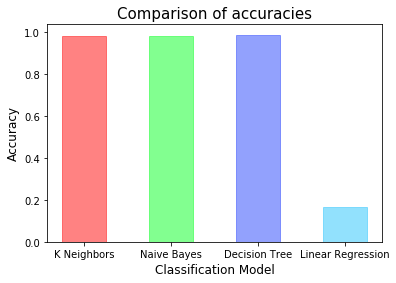

In [17]:
models=["K Neighbors","Naive Bayes","Decision Tree","Linear Regression"]
accuracies=[accuracy_knn,accuracy_nb,accuracy_dt,accuracy_lr]
barlist=plt.bar(models,accuracies,width=0.5,alpha=0.6)
plt.xlabel("Classification Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Comparison of accuracies", fontsize=15)
barlist[0].set_color("#ff2f2fd9")
barlist[1].set_color("#2fff46d9")
barlist[2].set_color("#4a62fda8")
barlist[3].set_color("#4acdfda8")